#อ่าน File จาก Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = 'drive/My Drive/3-Data Processing/Assignment Dp/sound/emo/'
print(os.listdir(data_path))

['angry (343).wav', 'angry (185).wav', 'angry (205).wav', 'angry (246).wav', 'angry (281).wav', 'angry (210).wav', 'angry (195).wav', 'angry (318).wav', 'angry (305).wav', 'angry (227).wav', 'angry (326).wav', 'angry (180).wav', 'angry (316).wav', 'angry (183).wav', 'angry (237).wav', 'angry (287).wav', 'angry (302).wav', 'angry (268).wav', 'angry (322).wav', 'angry (221).wav', 'angry (277).wav', 'angry (184).wav', 'angry (269).wav', 'angry (261).wav', 'angry (323).wav', 'angry (215).wav', 'angry (306).wav', 'angry (248).wav', 'angry (310).wav', 'angry (272).wav', 'angry (258).wav', 'angry (271).wav', 'angry (207).wav', 'angry (219).wav', 'angry (274).wav', 'angry (233).wav', 'angry (252).wav', 'angry (333).wav', 'angry (270).wav', 'angry (342).wav', 'angry (286).wav', 'angry (299).wav', 'angry (293).wav', 'angry (239).wav', 'angry (312).wav', 'angry (190).wav', 'angry (265).wav', 'angry (325).wav', 'angry (257).wav', 'angry (250).wav', 'angry (175).wav', 'angry (256).wav', 'angry (214

#import library

In [ ]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
from pickle import dump
from pickle import load

##DataSet

In [ ]:
dataset = data_path 
os.listdir(dataset)

['angry (343).wav',
 'angry (185).wav',
 'angry (205).wav',
 'angry (246).wav',
 'angry (281).wav',
 'angry (210).wav',
 'angry (195).wav',
 'angry (318).wav',
 'angry (305).wav',
 'angry (227).wav',
 'angry (326).wav',
 'angry (180).wav',
 'angry (316).wav',
 'angry (183).wav',
 'angry (237).wav',
 'angry (287).wav',
 'angry (302).wav',
 'angry (268).wav',
 'angry (322).wav',
 'angry (221).wav',
 'angry (277).wav',
 'angry (184).wav',
 'angry (269).wav',
 'angry (261).wav',
 'angry (323).wav',
 'angry (215).wav',
 'angry (306).wav',
 'angry (248).wav',
 'angry (310).wav',
 'angry (272).wav',
 'angry (258).wav',
 'angry (271).wav',
 'angry (207).wav',
 'angry (219).wav',
 'angry (274).wav',
 'angry (233).wav',
 'angry (252).wav',
 'angry (333).wav',
 'angry (270).wav',
 'angry (342).wav',
 'angry (286).wav',
 'angry (299).wav',
 'angry (293).wav',
 'angry (239).wav',
 'angry (312).wav',
 'angry (190).wav',
 'angry (265).wav',
 'angry (325).wav',
 'angry (257).wav',
 'angry (250).wav',


##อ่านข้อมูลแต่ละ Class

In [ ]:
happy = dataset+"/happy (*).wav"
sad = dataset+"/sad (*).wav"

#Baseline Model
**extract feature**



*   zero_crossing_rate
*   spectral_centroid



##Librosa Library

In [ ]:
import librosa
import librosa.display

อ่านข้อมูลด้วย librosa

In [ ]:
happy_signals = [
    librosa.load(p)[0] for p in Path().glob(happy) 
]

sad_signals = [
    librosa.load(p)[0] for p in Path().glob(sad) 
]

In [ ]:
len(happy_signals), len(sad_signals)

(400, 400)

ดูรูปร่างของ wave

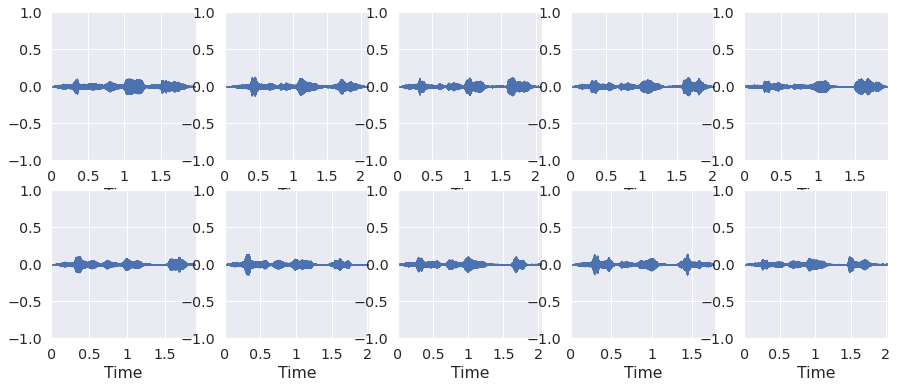

In [ ]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(happy_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveplot(x[:75000])
    plt.ylim(-1, 1)

##นิยาม extract features 

In [ ]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [ ]:
happy_features = np.array([extract_features(x) for x in happy_signals])
sad_features = np.array([extract_features(x) for x in sad_signals])

In [ ]:
print('happy : ',happy_features.shape)
print('sad : ',sad_features.shape)

happy :  (400, 2)
sad :  (400, 2)


##Plot Graph

เพื่อเปรียบเทียบแบบ Zero Crossing Rate

Text(0, 0.5, 'Count')

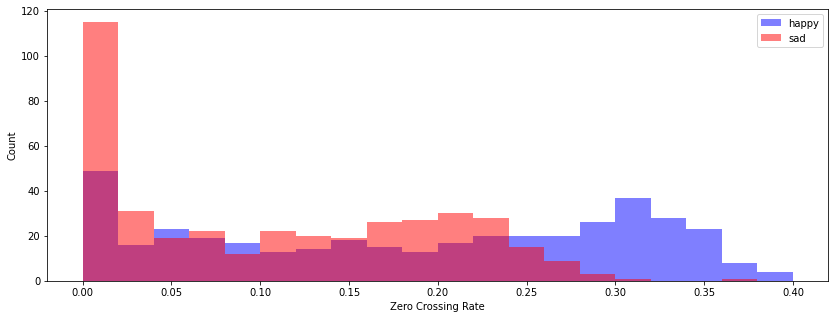

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(happy_features[:,0], color='b', range=(0, 0.4), alpha=0.5, bins=20)
plt.hist(sad_features[:,0], color='r', range=(0, 0.4), alpha=0.5, bins=20)
plt.legend(('happy', 'sad'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

เพื่อเปรียบเทียบแบบ Spectral Centroid

Text(0, 0.5, 'Count')

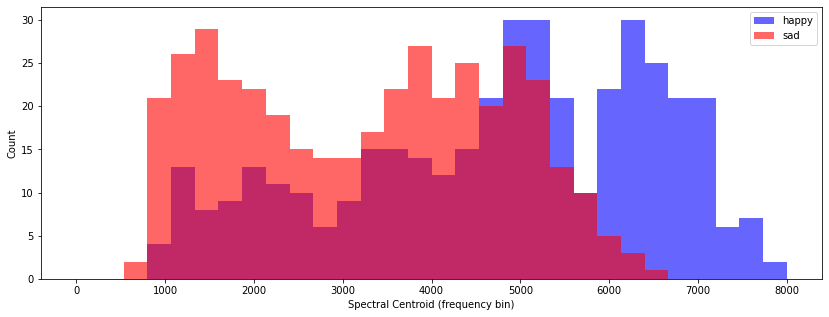

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(happy_features[:,1], color='b', range=(0, 8000), bins=30, alpha=0.6)
plt.hist(sad_features[:,1], color='r', range=(0, 8000), bins=30, alpha=0.6)
plt.legend(('happy', 'sad'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

กำหนด feature table

In [ ]:
feature_table = np.vstack((happy_features, sad_features))
print("dataset :",feature_table.shape)

data set : (800, 2)


กำหนด scale ของข้อมูล feature ให้อยู่ในช่วง -1 ถึง 1

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
data_features = scaler.fit_transform(feature_table)
print(data_features.min(axis=0))
print(data_features.max(axis=0))

[-1. -1.]
[1. 1.]


Plot Scatter

Text(0, 0.5, 'Spectral Centroid')

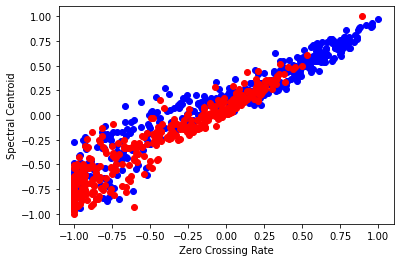

In [ ]:
plt.scatter(data_features[:400,0], data_features[:400,1], c='b')
plt.scatter(data_features[400:,0], data_features[400:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

##ข้อมูล train test validation

Encoding ผลเฉลย

In [ ]:
y = [0 for i in range(400)] + [1 for i in range(400)]

In [ ]:
# y[395:405]

In [ ]:
y_encoded = to_categorical(y)

In [ ]:
# y_encoded[395:405]

แบ่งข้อมูล 

แบ่งข้อมูล เพื่อ Train และ Test

In [ ]:
train_data, test_data, y_train, y_test = train_test_split(data_features, y_encoded, test_size=0.2, shuffle=True)

In [ ]:
train_data.shape, test_data.shape, y_train.shape, y_test.shape

((640, 2), (160, 2), (640, 2), (160, 2))

แบ่งข้อมูล เพื่อ Train และ Validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y_train, test_size=0.2, shuffle=True)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((512, 2), (128, 2), (512, 2), (128, 2))

In [ ]:
print(f'Shape ::\n  Train : {x_train.shape[0]}\n  Valid : {x_val.shape[0]}\n  Test  : {test_data.shape[0]}')

Shape ::
  Train : 512
  Valid : 128
  Test  : 160


##Model 

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

นิยาม create_model

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(2,)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    return model

In [ ]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate = 0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 8)                 24        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


Train Model

In [ ]:
his = model.fit(
    x_train, y_train,
    batch_size=1,
    epochs=1000, 
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/1000
512/512 [==============================] - 2s 3ms/step - loss: 0.6328 - accuracy: 0.5977 - val_loss: 0.6039 - val_accuracy: 0.6719
Epoch 2/1000
512/512 [==============================] - 1s 3ms/step - loss: 0.6296 - accuracy: 0.6035 - val_loss: 0.6012 - val_accuracy: 0.6797
Epoch 3/1000
512/512 [==============================] - 2s 3ms/step - loss: 0.6307 - accuracy: 0.6094 - val_loss: 0.5991 - val_accuracy: 0.6797
Epoch 4/1000
512/512 [==============================] - 2s 3ms/step - loss: 0.6264 - accuracy: 0.6230 - val_loss: 0.5974 - val_accuracy: 0.6797
Epoch 5/1000
512/512 [==============================] - 1s 3ms/step - loss: 0.6248 - accuracy: 0.6094 - val_loss: 0.5962 - val_accuracy: 0.6797
Epoch 6/1000
512/512 [==============================] - 2s 3ms/step - loss: 0.6234 - accuracy: 0.6113 - val_loss: 0.5952 - val_accuracy: 0.6797
Epoch 7/1000
512/512 [==============================] - 1s 3ms/step - loss: 0.6249 - accuracy: 0.6172 - val_loss: 0.5944 - val_accuracy:

Plot Graph

In [ ]:
import plotly
import plotly.graph_objs as go

Plot Loss

In [ ]:
h1 = go.Scatter(y=his.history['loss'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="loss"
               )
h2 = go.Scatter(y=his.history['val_loss'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_loss"
               )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                    xaxis=dict(title='epochs'),yaxis=dict(title='')
                   )
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="acc"
               )
h2 = go.Scatter(y=his.history['val_accuracy'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_acc"
               )
data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

##Evaluate

In [ ]:
score = model.evaluate(test_data,y_test, verbose = 0)
print("Test Loss:: ",score[0])
print("Test Accuracy:: ",score[1])

Test Loss::  0.040302444249391556
Test Accuracy::  0.9750000238418579


Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

เตรียมทำcm 

In [ ]:
predicted_classes = model.predict(test_data)
predicted_classes = np.argmax(predicted_classes,axis = -1)

In [ ]:
y_true = np.argmax(y_test,axis = -1)

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm

array([[51, 30],
       [ 8, 71]])

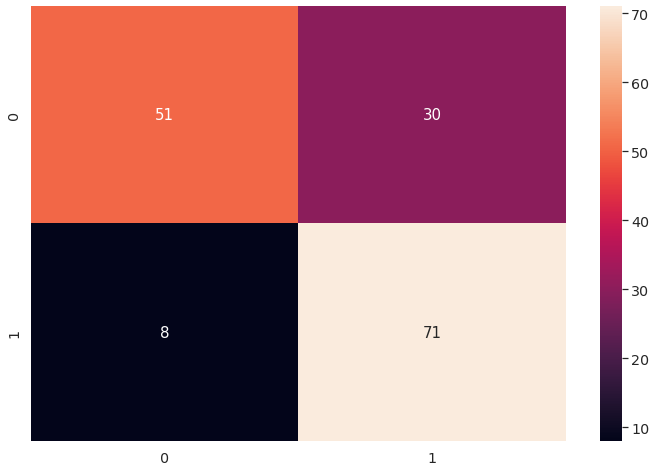

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='g') # for num predict size

plt.show()

แสดง precision 

In [ ]:
CATEGORIES = ['Happy','Sad']

In [ ]:
report = classification_report(y_true, predicted_classes, target_names=CATEGORIES, digits=4)

print(report)

              precision    recall  f1-score   support

       Happy     0.8644    0.6296    0.7286        81
         Sad     0.7030    0.8987    0.7889        79

    accuracy                         0.7625       160
   macro avg     0.7837    0.7642    0.7587       160
weighted avg     0.7847    0.7625    0.7584       160



#CNN Model
**extract feature**


*   mfcc

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
file_name = 'drive/My Drive/3-Data Processing/Assignment Dp/sound/emo/happy (1).wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(44121,) 22050
(40, 87)


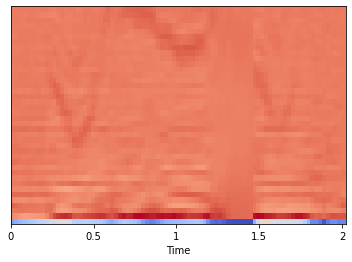

In [ ]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [ ]:
len(list(Path().glob(sad)))

400

In [ ]:
len(list(Path().glob(happy)))

400

##นิยาม extract feature

In [ ]:
max_pad_len = 200

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant') 
    return mfccs

In [ ]:
happy_features = []
for file_name in Path().glob(happy):
    data = extract_features(file_name)
    
    happy_features.append(data)

In [ ]:
print(len(happy_features))
happy_features[0].shape

400


(40, 200)

In [ ]:
sad_features = []
for file_name in Path().glob(sad):
    data = extract_features(file_name)
    
    sad_features.append(data)

In [ ]:
print(len(sad_features))
sad_features[0].shape

400


(40, 200)

##ข้อมูล train test validation

In [ ]:
feature_table = np.vstack((happy_features, sad_features))
print(feature_table.shape)

(800, 40, 200)


In [ ]:
feature_table = feature_table.reshape(feature_table.shape[0], feature_table.shape[1], feature_table.shape[2], 1)
print(feature_table.shape)

(800, 40, 200, 1)


In [ ]:
y_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

แบ่งข้อมูล เพื่อ Train และ Test

In [ ]:
train_data, test_data, y_train, y_test = train_test_split(feature_table, y_encoded, test_size=0.2, shuffle=True)

In [ ]:
train_data.shape, test_data.shape, y_train.shape, y_test.shape

((640, 40, 200, 1), (160, 40, 200, 1), (640, 2), (160, 2))

แบ่งข้อมูล เพื่อ Train และ Validation

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_data, y_train, test_size=0.2, shuffle=True)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((512, 40, 200, 1), (128, 40, 200, 1), (512, 2), (128, 2))

In [ ]:
print(f'Shape ::\n  Train : {x_train.shape[0]}\n  Valid : {x_val.shape[0]}\n  Test  : {test_data.shape[0]}')

Shape ::
  Train : 512
  Valid : 128
  Test  : 160


##Model

In [ ]:
num_rows = 40
num_columns = 200
num_channels = 1
num_batch_size = 64
epochs = 500

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [ ]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1)

Epoch 1/500
8/8 [==============================] - 3s 107ms/step - loss: 1.9225 - accuracy: 0.5215 - val_loss: 0.5650 - val_accuracy: 0.5547
Epoch 2/500
8/8 [==============================] - 0s 50ms/step - loss: 0.5243 - accuracy: 0.7480 - val_loss: 0.2506 - val_accuracy: 1.0000
Epoch 3/500
8/8 [==============================] - 0s 43ms/step - loss: 0.2569 - accuracy: 0.8965 - val_loss: 0.2098 - val_accuracy: 0.9844
Epoch 4/500
8/8 [==============================] - 0s 38ms/step - loss: 0.1700 - accuracy: 0.9277 - val_loss: 0.0881 - val_accuracy: 1.0000
Epoch 5/500
8/8 [==============================] - 0s 36ms/step - loss: 0.0760 - accuracy: 0.9883 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 6/500
8/8 [==============================] - 0s 34ms/step - loss: 0.0473 - accuracy: 0.9883 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 7/500
8/8 [==============================] - 0s 36ms/step - loss: 0.0253 - accuracy: 0.9980 - val_loss: 0.0336 - val_accuracy: 1.0000
Epoch 8/500
8/8 [==

In [ ]:
import plotly
import plotly.graph_objs as go

Plot Loss

In [ ]:
h1 = go.Scatter(y=his.history['loss'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="loss"
               )
h2 = go.Scatter(y=his.history['val_loss'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_loss"
               )
data = [h1,h2]
layout1 = go.Layout(title='Loss',
                    xaxis=dict(title='epochs'),yaxis=dict(title='')
                   )
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=his.history['accuracy'], 
                    mode="lines", line=dict(width=2, color='blue'),
                    name="acc"
               )
h2 = go.Scatter(y=his.history['val_accuracy'], 
                    mode="lines", line=dict(width=2, color='red'),
                    name="val_acc"
               )
data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

##Evalate

In [ ]:
score = model.evaluate(test_data,y_test, verbose = 0)
print("Test Loss:: ",score[0])
print("Test Accuracy:: ",score[1])

Test Loss::  8.284786190415616e-07
Test Accuracy::  1.0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

Confusion matrix

เตรียมทำcm 

In [ ]:
predicted_classes = model.predict(test_data)
predicted_classes = np.argmax(predicted_classes,axis = -1)

In [ ]:
y_true = np.argmax(y_test,axis = -1)

In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
cm

array([[74,  0],
       [ 0, 86]])

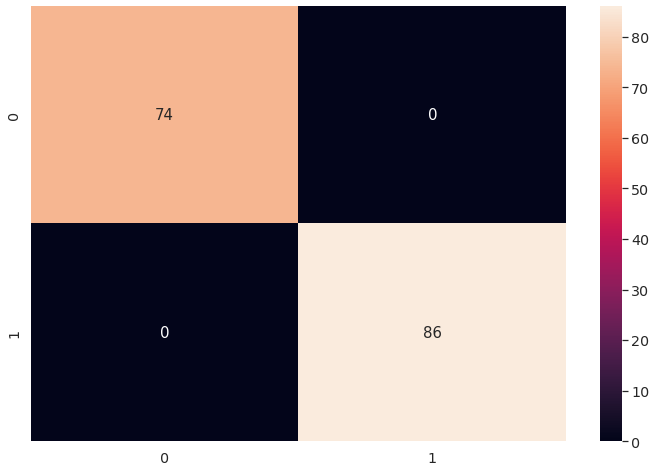

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(12,8))
sn.set(font_scale=1.3) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='g') # for num predict size

plt.show()

แสดง precision 

In [ ]:
CATEGORIES = ['Happy','Sad']

In [ ]:
report = classification_report(y_true, predicted_classes, target_names=CATEGORIES, digits=4)

print(report)

              precision    recall  f1-score   support

       Happy     1.0000    1.0000    1.0000        74
         Sad     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       160
   macro avg     1.0000    1.0000    1.0000       160
weighted avg     1.0000    1.0000    1.0000       160

